In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
#decoding
word_index = reuters.get_word_index()
reverse_word_index = dict([(values, keys) for (keys, values) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
import numpy as np
def vectorize_seqs(seqs, dimension=10000):
    results = np.zeros((len(seqs), dimension))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results
x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)

In [8]:
def to_one_hot(labels, dimension=46): #to_categorical
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)    

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

C:\Users\IAN\anaconda3\envs\Tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = train_labels[:1000]
partial_y_labels = train_labels[1000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_labels,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9635 - loss: 0.0841 - val_accuracy: 0.8080 - val_loss: 1.0425
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9647 - loss: 0.0900 - val_accuracy: 0.8040 - val_loss: 1.0337
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9620 - loss: 0.0824 - val_accuracy: 0.7990 - val_loss: 1.0738
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9664 - loss: 0.0855 - val_accuracy: 0.8180 - val_loss: 1.0405
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9624 - loss: 0.0843 - val_accuracy: 0.8140 - val_loss: 1.0620
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9659 - loss: 0.0843 - val_accuracy: 0.8100 - val_loss: 1.0740
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9661 - loss: 0.0845 - val_accuracy: 0.8040 - val_loss: 1.0481
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9634 - loss: 0.0867 - val_accuracy: 0.8120 - val_loss:

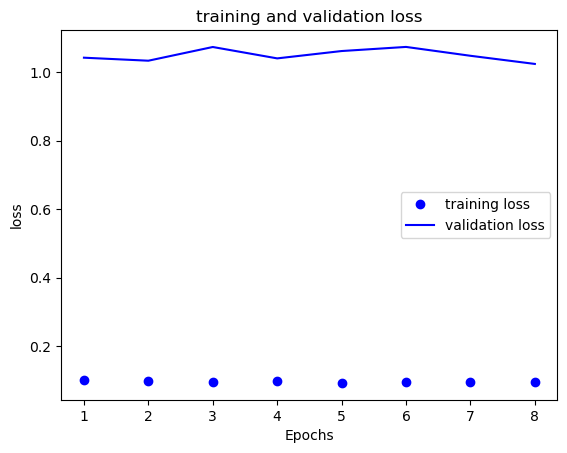

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, "b", label ="validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

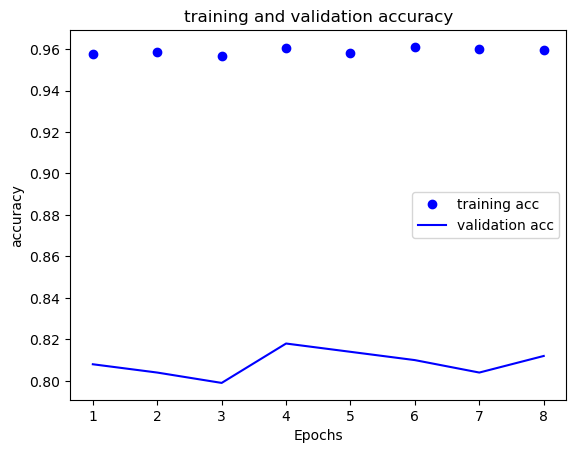

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [26]:
results = model.evaluate(x_test, test_labels)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8098 - loss: 1.1123
